In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
#import kera
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import LeakyReLU,ReLU,ELU 
from sklearn.metrics import accuracy_score

In [117]:
df = pd.read_csv("iris.csv")

In [118]:
df.head()

,A,B,C,D,E
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [119]:
df['E'].value_counts()

Iris-setosa        50
Iris-versicolor    49
Name: E, dtype: int64

In [120]:
df.shape

(99, 5)

In [121]:
df.isnull().sum()

A    0
B    0
C    0
D    0
E    0
dtype: int64

In [122]:
df['E'] = np.where(df['E'] == 'Iris-setosa', 0, 1)

In [123]:
X = df.drop('E',axis=1)
y = df['E']

In [124]:
def plot(df):
    plt.scatter(df[df['E']==0].A,df[df['E']==0].B, color='red', marker='o', label='setosa')
    plt.scatter(df[df['E']==1].A,df[df['E']==1].B, color='blue', marker='o', label='versicolor')
    plt.xlabel('petal length')
    plt.ylabel('sepal length')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.scatter(df[df['E']==0].C,df[df['E']==0].D, color='red', marker='o', label='setosa')
    plt.scatter(df[df['E']==1].C,df[df['E']==1].D, color='blue', marker='o', label='versicolor')
    plt.xlabel('petal length')
    plt.ylabel('sepal length')
    plt.legend(loc='upper left')
    plt.show()

In [125]:
def predict(df,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    classifier = Sequential()
    #Input layer
    classifier.add(Dense(units= 6,kernel_initializer='he_uniform',activation='relu',input_dim=4))
    #First hidden layer
    classifier.add(Dense(2))
    classifier.add(Dropout(0.1))
    #Output layer
    classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    model_history = classifier.fit(X_train,y_train,validation_split=0.3,batch_size=10,epochs=100)

In [126]:
def accuracy_plot():
    plt.plot(model_history.history['accuracy'])
    plt.plot(model_history.history['val_accuracy'])
    plt.title("Model accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("epoch")

In [127]:
#Making prediction and evaluating model
def prediction_acc():
    y_pred = classifier.predict(X_test)
    y_pred = (y_pred>0.5)
    score = accuracy_score(y_pred,y_test)
    print(score)

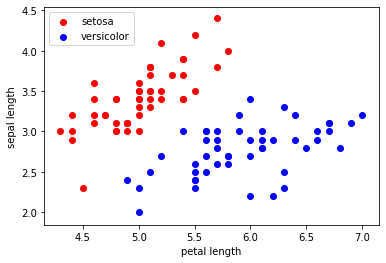

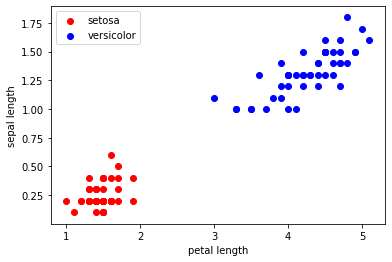

In [128]:
plot(df)


In [129]:
predict(df,X,y)

Epoch 1/100
6/6 [==============================] - 0s 28ms/step - loss: 0.4660 - accuracy: 0.8545 - val_loss: 0.4733 - val_accuracy: 0.7917
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.4346 - accuracy: 0.8545 - val_loss: 0.4566 - val_accuracy: 0.8333
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 0.4455 - accuracy: 0.8000 - val_loss: 0.4412 - val_accuracy: 0.9583
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 0.4144 - accuracy: 0.9091 - val_loss: 0.4271 - val_accuracy: 1.0000
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.4431 - accuracy: 0.8545 - val_loss: 0.4131 - val_accuracy: 1.0000
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.3878 - accuracy: 0.9091 - val_loss: 0.3997 - val_accuracy: 1.0000
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.4060 - accuracy: 0.9273 - val_loss: 0.3861 - val_accuracy: 1.0000
Epoch 8/100
6/6 [========

6/6 [==============================] - 0s 7ms/step - loss: 0.0943 - accuracy: 1.0000 - val_loss: 0.0483 - val_accuracy: 1.0000
Epoch 60/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0624 - accuracy: 1.0000 - val_loss: 0.0465 - val_accuracy: 1.0000
Epoch 61/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0691 - accuracy: 1.0000 - val_loss: 0.0446 - val_accuracy: 1.0000
Epoch 62/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0801 - accuracy: 1.0000 - val_loss: 0.0428 - val_accuracy: 1.0000
Epoch 63/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0688 - accuracy: 1.0000 - val_loss: 0.0411 - val_accuracy: 1.0000
Epoch 64/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0488 - accuracy: 1.0000 - val_loss: 0.0395 - val_accuracy: 1.0000
Epoch 65/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0694 - accuracy: 0.9818 - val_loss: 0.0379 - val_accuracy: 1.0000
Epoch 66/100
6/6 [===============

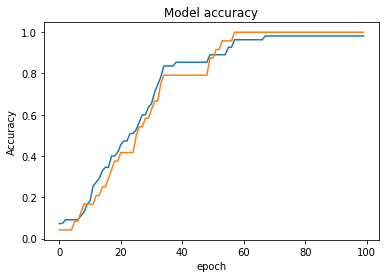

In [130]:
accuracy_plot()

In [131]:
prediction_acc()

1.0


In [132]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 14        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 47
Trainable params: 47
Non-trainable params: 0
_________________________________________________________________
